In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

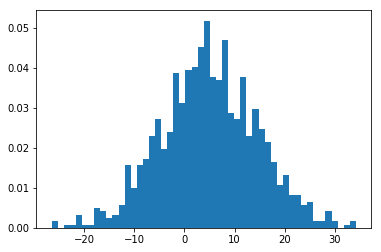

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(True)

CMA on 16 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=418879, Mon Oct 30 12:56:38 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 5.971662045163811e+04 1.0e+00 9.94e-02  1e-01  1e-01 0:00.3
    2     18 5.020175608732328e+04 1.4e+00 9.35e-02  9e-02  9e-02 0:00.7
    3     27 2.279616704846515e+04 1.4e+00 1.15e-01  1e-01  1e-01 0:01.0
   14    126 4.556698524993801e+03 2.2e+00 3.23e-01  3e-01  3e-01 0:04.2
   24    216 3.711688690283866e+03 3.8e+00 2.52e-01  2e-01  3e-01 0:08.2
   41    369 3.823117942745238e+03 4.7e+00 8.42e-02  4e-02  9e-02 0:13.4
   63    567 3.689116663303378e+03 8.0e+00 4.91e-02  2e-02  4e-02 0:19.6
   88    792 3.686102057124982e+03 2.5e+01 8.20e-03  2e-03  6e-03 0:26.9
  100    900 3.686091878441507e+03 3.7e+01 3.21e-03  5e-04  2e-03 0:30.4
  128   1152 3.686091801135108e+03 1.3e+02 4.02e-04  2e-05  3e-04 0:39.8
  139   1251 3.686091800910107e+03 2.2e+02 1.98e-04  6e-06  2e-04 0:44.1
CMAEvolutionStrategyResult(xbest=ar

## Testing output

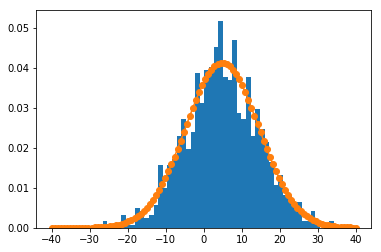

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

In [ ]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [ ]:
a = RTBM(1,2)

In [ ]:
minim = minimizer.CMA(True)

In [ ]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')